In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/continousgesture/videos-20250625T070951Z-1-002/videos/videos03.tgz
/kaggle/input/continousgesture/videos-20250625T070951Z-1-002/videos/videos01.tgz
/kaggle/input/continousgesture/videos-20250625T070951Z-1-003/videos/videos04.tgz
/kaggle/input/continousgesture/videos-20250625T070951Z-1-001/videos/videos02.tgz
/kaggle/input/continousgesture/videos-20250625T070951Z-1-001/videos/videos05.tgz


In [2]:
import os
dataset_path = '/kaggle/input/continousgesture'
print(f"Listing contents for: {dataset_path}\n" + "="*50)
if not os.path.exists(dataset_path):
    print(f"Error: The directory '{dataset_path}' does not exist.")
else:
    for root, dirs, files in os.walk(dataset_path):
        level = root.replace(dataset_path, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f"{indent}{os.path.basename(root)}/")
        sub_indent = ' ' * 4 * (level + 1)
        for f in files:
            print(f"{sub_indent}- {f}")
print("\n" + "="*50 + "\nEnd of directory listing.")

Listing contents for: /kaggle/input/continousgesture
continousgesture/
    videos-20250625T070951Z-1-002/
        videos/
            - videos03.tgz
            - videos01.tgz
    videos-20250625T070951Z-1-003/
        videos/
            - videos04.tgz
    videos-20250625T070951Z-1-001/
        videos/
            - videos02.tgz
            - videos05.tgz

End of directory listing.


Source directory: /kaggle/input/continousgesture/
Extraction directory: /kaggle/working/extracted_videos/

Searching for .tgz archives...
Found 5 archives. Starting extraction...
Extracting 'videos03.tgz'...
Extracting 'videos01.tgz'...
Extracting 'videos04.tgz'...
Extracting 'videos02.tgz'...
Extracting 'videos05.tgz'...
Extraction complete.

--- Previewing Extracted Content ---
Successfully found 200 video files.
Loading a sample for preview: '1CM42_4_R_#187.avi'


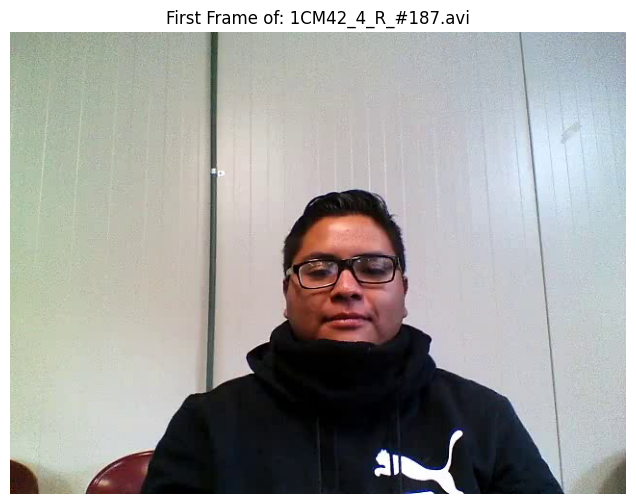

In [3]:
import os
import tarfile
import cv2
import matplotlib.pyplot as plt
import random

# --- 1. Define Paths ---
# Path to the directory containing your .tgz files
SOURCE_DATA_DIR = '/kaggle/input/continousgesture/'

# Path where the actual video files will be extracted
EXTRACTION_DIR = '/kaggle/working/extracted_videos/'

print(f"Source directory: {SOURCE_DATA_DIR}")
print(f"Extraction directory: {EXTRACTION_DIR}")

# Create the extraction directory if it doesn't exist
os.makedirs(EXTRACTION_DIR, exist_ok=True)

# --- 2. Find and Extract All .tgz Archives ---
print("\nSearching for .tgz archives...")
tgz_files_found = []
for root, _, files in os.walk(SOURCE_DATA_DIR):
    for file in files:
        if file.lower().endswith('.tgz'):
            full_path = os.path.join(root, file)
            tgz_files_found.append(full_path)

if not tgz_files_found:
    print("No .tgz files found. Please check your SOURCE_DATA_DIR path.")
else:
    print(f"Found {len(tgz_files_found)} archives. Starting extraction...")
    for tgz_path in tgz_files_found:
        try:
            print(f"Extracting '{os.path.basename(tgz_path)}'...")
            with tarfile.open(tgz_path, 'r:gz') as tar:
                tar.extractall(path=EXTRACTION_DIR)
        except Exception as e:
            print(f"Error extracting {tgz_path}: {e}")
    print("Extraction complete.")


# --- 3. List and Preview Extracted Video Files ---
print("\n--- Previewing Extracted Content ---")
extracted_video_files = []
for root, _, files in os.walk(EXTRACTION_DIR):
    for file in files:
        if file.lower().endswith(('.mp4', '.avi', '.mov')):
            extracted_video_files.append(os.path.join(root, file))

if not extracted_video_files:
    print("No video files (.mp4, .avi, .mov) were found after extraction.")
    print("Please check the contents of the .tgz archives.")
else:
    print(f"Successfully found {len(extracted_video_files)} video files.")

    # Select a random video to preview
    sample_video_path = random.choice(extracted_video_files)
    print(f"Loading a sample for preview: '{os.path.basename(sample_video_path)}'")

    try:
        # Open the video file
        cap = cv2.VideoCapture(sample_video_path)
        ret, frame = cap.read()
        cap.release()

        if ret:
            # Convert frame from BGR (OpenCV default) to RGB (matplotlib default)
            frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            # Display the frame
            plt.figure(figsize=(8, 6))
            plt.imshow(frame_rgb)
            plt.title(f"First Frame of: {os.path.basename(sample_video_path)}")
            plt.axis('off')
            plt.show()
        else:
            print("Could not read the first frame of the sample video.")
    except Exception as e:
        print(f"An error occurred during preview: {e}")

In [4]:
!pip install --upgrade tensorflow keras tensorflow-hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 101.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
tensorflo

2025-08-03 05:37:54.462652: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754199474.485295      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754199474.492036      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Detected 4 classes: ['1CM1', '1CM42', '1CV12', '4CM11']
Dataset ready: 160 training samples, 40 test samples.


I0000 00:00:1754199559.998639      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ video_input (InputLayer)        │ (None, 32, 224, 224,   │             0 │
│                                 │ 3)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 32, 224, 224,   │             0 │
│                                 │ 3)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 32, 224, 224,   │             0 │
│                                 │ 3)                     │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 32, 2048)       │    23,564,800 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │     2,229,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,795,076 (98.40 MB)

 Trainable params: 2,230,276 (8.51 MB)

 Non-trainable params: 23,564,800 (89.89 MB)


--- STAGE 1: Training LSTM and Classifier ---
Epoch 1/100


I0000 00:00:1754199803.905160     843 cuda_dnn.cc:529] Loaded cuDNN version 90300


16/16 ━━━━━━━━━━━━━━━━━━━━ 329s 6s/step - accuracy: 0.4531 - loss: 1.2754 - val_accuracy: 0.5312 - val_loss: 1.0470 - learning_rate: 0.0010
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 893ms/step - accuracy: 0.7266 - loss: 0.7249 - val_accuracy: 0.6250 - val_loss: 0.8644 - learning_rate: 0.0010
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 892ms/step - accuracy: 0.8359 - loss: 0.4602 - val_accuracy: 0.7812 - val_loss: 0.6336 - learning_rate: 0.0010
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 894ms/step - accuracy: 0.9375 - loss: 0.2719 - val_accuracy: 0.7500 - val_loss: 0.6168 - learning_rate: 0.0010
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 893ms/step - accuracy: 0.9688 - loss: 0.1648 - val_accuracy: 0.8125 - val_loss: 0.4280 - learning_rate: 0.0010
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 890ms/step - accuracy: 0.9766 - loss: 0.1320 - val_accuracy: 0.8750 - val_loss: 0.3911 - learning_rate: 0.0010
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 888ms/step - accuracy: 0.9922 - loss: 0.0811 - 

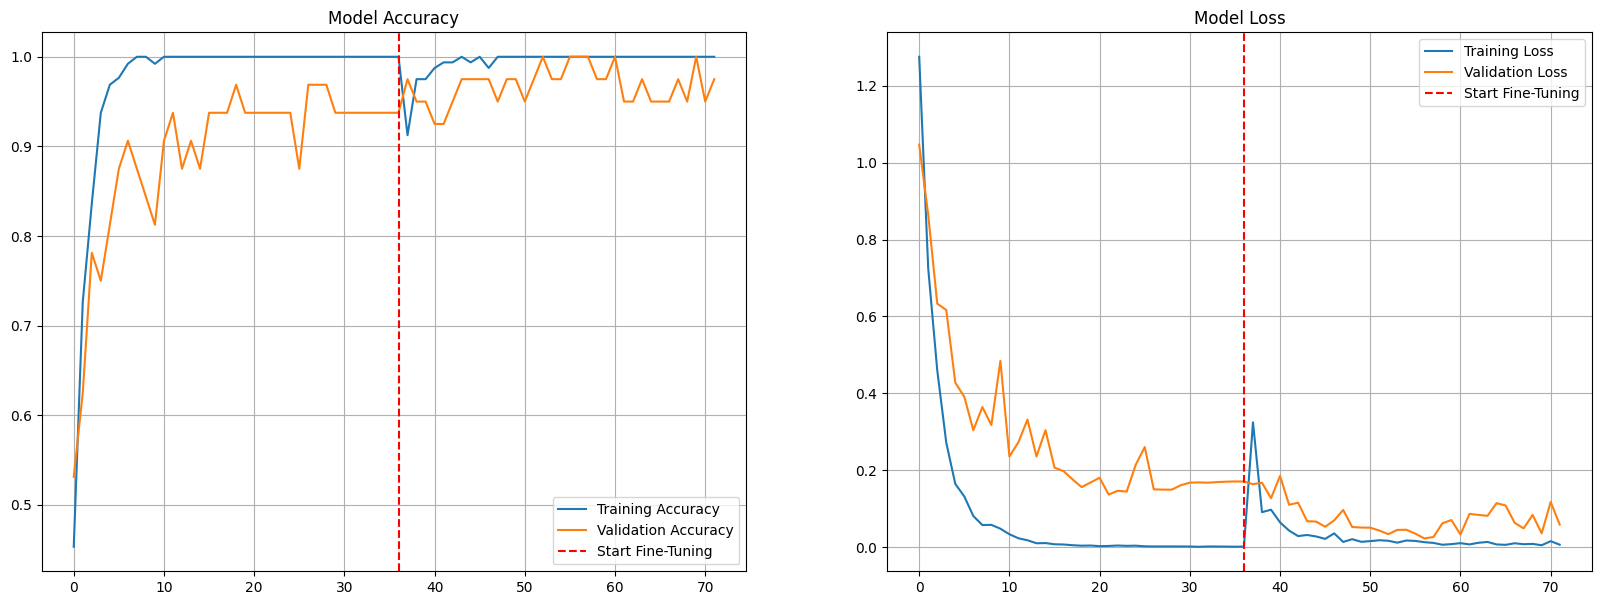

2/2 ━━━━━━━━━━━━━━━━━━━━ 160s 77s/step

Classification Report:
              precision    recall  f1-score   support

        1CM1       1.00      1.00      1.00         3
       1CM42       1.00      1.00      1.00        13
       1CV12       1.00      1.00      1.00        10
       4CM11       1.00      1.00      1.00        14

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



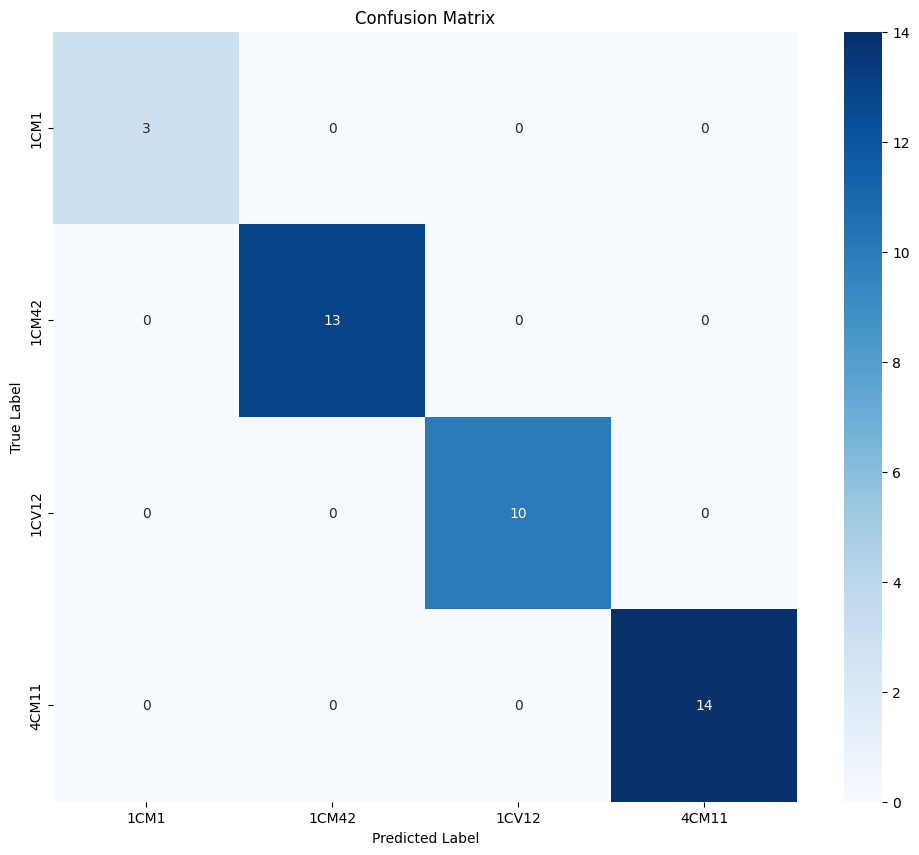


--- Saving Model and History ---
Model and training history have been saved successfully.


In [5]:
import os
import re
import cv2
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input as resnet_preprocess
from tensorflow.keras.layers import TimeDistributed, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ==============================================================================
# 1. DATA LOADING & PREPROCESSING
# ==============================================================================

IMAGE_HEIGHT, IMAGE_WIDTH = 224, 224
SEQUENCE_LENGTH = 32
DATASET_DIR = '/kaggle/working/extracted_videos/'

def load_video(video_path):
    frames = []
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames < SEQUENCE_LENGTH:
        cap.release()
        return None
    frame_indices = np.linspace(0, total_frames - 1, SEQUENCE_LENGTH, dtype=int)
    for i in frame_indices:
        cap.set(cv2.CAP_PROP_POS_FRAMES, i)
        ret, frame = cap.read()
        if not ret:
            frame = frames[-1] if frames else np.zeros((IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.uint8)
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))
        frames.append(frame)
    cap.release()
    return np.array(frames)

def create_dataset(dataset_dir):
    features, labels = [], []
    video_files = [os.path.join(root, f) for root, _, files in os.walk(dataset_dir) for f in files if f.lower().endswith(('.mp4', '.avi', '.mov'))]
    if not video_files:
        print(f"ERROR: No video files found in '{dataset_dir}'.")
        return None, None, None
    gesture_ids = sorted(list(set([os.path.basename(f).split('_')[0] for f in video_files])))
    class_map = {name: i for i, name in enumerate(gesture_ids)}
    print(f"Detected {len(class_map)} classes: {list(class_map.keys())}")
    for video_path in video_files:
        gesture_id = os.path.basename(video_path).split('_')[0]
        label_index = class_map[gesture_id]
        frames = load_video(video_path)
        if frames is not None:
            features.append(frames)
            labels.append(label_index)
    if not features: return None, None, None
    features = np.array(features, dtype=np.float32) 
    labels = np.array(labels, dtype=np.int32)
    return features, labels, list(class_map.keys())

features, labels, class_names = create_dataset(DATASET_DIR)
if features is not None:
    NUM_CLASSES = len(class_names)
    labels_one_hot = tf.keras.utils.to_categorical(labels, num_classes=NUM_CLASSES)
    X_train, X_test, y_train, y_test = train_test_split(features, labels_one_hot, test_size=0.20, random_state=42, stratify=labels)
    print(f"Dataset ready: {X_train.shape[0]} training samples, {X_test.shape[0]} test samples.")

# ==============================================================================
# 2. MODEL DEFINITION
# ==============================================================================

def create_resnet_model(num_classes):
    base_cnn = ResNet50V2(include_top=False, weights='imagenet', pooling='avg', input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3))
    base_cnn.trainable = False
    video_input = tf.keras.Input(shape=(SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3), name='video_input')
    preprocessed_input = resnet_preprocess(video_input)
    encoded_frames = TimeDistributed(base_cnn)(preprocessed_input)
    encoded_sequence = Bidirectional(LSTM(128, return_sequences=False))(encoded_frames)
    x = Dropout(0.5)(encoded_sequence)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = Model(video_input, outputs)
    return model

# ==============================================================================
# 3. PLOTTING FUNCTION
# ==============================================================================

def plot_full_history(history1, history2):
    acc = history1.history['accuracy'] + history2.history['accuracy']
    val_acc = history1.history['val_accuracy'] + history2.history['val_accuracy']
    loss = history1.history['loss'] + history2.history['loss']
    val_loss = history1.history['val_loss'] + history2.history['val_loss']
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))
    ax1.plot(acc, label='Training Accuracy')
    ax1.plot(val_acc, label='Validation Accuracy')
    ax1.axvline(len(history1.history['accuracy']) - 1, color='r', linestyle='--', label='Start Fine-Tuning')
    ax1.set_title('Model Accuracy')
    ax1.legend(loc='lower right')
    ax1.grid(True)
    ax2.plot(loss, label='Training Loss')
    ax2.plot(val_loss, label='Validation Loss')
    ax2.axvline(len(history1.history['loss']) - 1, color='r', linestyle='--', label='Start Fine-Tuning')
    ax2.set_title('Model Loss')
    ax2.legend(loc='upper right')
    ax2.grid(True)
    plt.show()

# ==============================================================================
# 4. MODEL TRAINING, EVALUATION, AND SAVING
# ==============================================================================

if 'X_train' in locals() and X_train is not None:
    model = create_resnet_model(NUM_CLASSES)
    model.summary()
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True, verbose=1)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, verbose=1)

    print("\n--- STAGE 1: Training LSTM and Classifier ---")
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    history_stage1 = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

    print("\n--- STAGE 2: Fine-Tuning CNN Base ---")
    
    base_cnn = model.layers[1].layer 
    base_cnn.trainable = True
    fine_tune_at = int(len(base_cnn.layers) * 0.85)
    for layer in base_cnn.layers[:fine_tune_at]:
        layer.trainable = False
        
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    history_stage2 = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test), callbacks=[early_stopping, reduce_lr])

    print("\n--- Final Model Evaluation ---")
    final_loss, final_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Final Test Accuracy: {final_accuracy * 100:.2f}%")

    print("\n--- Plotting Training History and Results ---")
    plot_full_history(history_stage1, history_stage2)

    y_pred_probs = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
    y_true_classes = np.argmax(y_test, axis=1)
    print("\nClassification Report:")
    print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))

    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    print("\n--- Saving Model and History ---")
    model.save('resnet_bilstm_model.keras')
    with open('resnet_history_stage1.pkl', 'wb') as file:
        pickle.dump(history_stage1.history, file)
    with open('resnet_history_stage2.pkl', 'wb') as file:
        pickle.dump(history_stage2.history, file)
    print("Model and training history have been saved successfully.")
else:
    print("\nModel training skipped because data could not be loaded.")